# 운동량 데이터 분석해 보기
## 데이터를 저장하고 읽기

In [2]:
import pandas as pd
practice = pd.DataFrame({'날짜': [], '운동':[],'양':[]})
practice

,날짜,운동,양


In [3]:
practice.loc[0] = ['19-3-1', '달리기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [11]:
practice.loc[1] = ['19-3-2', '걷기', 1.]
practice.loc[2] = ['19-3-2', '달리기', 1.]
practice.loc[3] = ['19-3-2', '계단오르기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [12]:
practice.loc[4] = ['19-3-3', '걷기', 1.5]
practice.loc[5] = ['19-3-3', '달리기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [13]:
practice.to_csv("../data/practice.csv", encoding = 'utf-8')

In [14]:
# Unnamed: 0 이게 붙어서 출력된다.
pd.read_csv("../data/practice.csv", encoding = 'utf-8')

,Unnamed: 0,날짜,운동,양
0,0,19-3-1,달리기,1.0
1,1,19-3-2,걷기,1.0
2,2,19-3-2,달리기,1.0
3,3,19-3-2,계단오르기,1.0
4,4,19-3-3,걷기,1.5
5,5,19-3-3,달리기,1.0
6,6,19-3-4,걷기,1.5
7,7,19-3-5,달리기,1.0
8,8,19-3-6,걷기,2.5
9,9,19-3-6,달리기,0.5


In [15]:
# index_col = 0을 입력하면 위에서처럼 Unnamed: 0 없이 출력된다.
pd.read_csv("../data/practice.csv", index_col = 0, encoding = 'utf-8')

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [16]:
practice = pd.read_csv("../data/practice.csv", index_col = 0, encoding = 'utf-8')
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [17]:
practice.loc[6] = ['19-3-4', '걷기', 1.5]
practice.loc[7] = ['19-3-5', '달리기', 1.]
practice.loc[8] = ['19-3-6', '걷기', 2.5]
practice.loc[9] = ['19-3-6', '달리기', 0.5]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


## 데이터를 정리하는 마법같은 단어 pivot_table

In [19]:
# 평균이 찍혀 나온다
practice.pivot_table(index = "운동") 

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [20]:
import numpy as np
# aggfunc옵션 : np.sum 합계 적용
practice.pivot_table(index="운동", aggfunc = np.sum)

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [21]:
practice.pivot_table(index = "운동", aggfunc=[np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [22]:
practice.pivot('날짜','운동','양')

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


In [23]:
prac_pivot = practice.pivot('날짜','운동','양')
prac_pivot.fillna(0, inplace = True) # fillna(0, inplace = True) 는 위에 NaN값을 다 으로 처리
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0
19-3-4,1.5,0.0,0.0
19-3-5,0.0,0.0,1.0
19-3-6,2.5,0.0,0.5


# 운동을 하지 않는 이유 데이터 분석

In [4]:
not_exercise = pd.read_excel("../data/not_exercise.xls")
not_exercise.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [5]:
# '기간' 칼럼은 의미가 없으므로 삭제
not_exercise.drop(columns = '기간', inplace = True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [6]:
# 목적과 상관없는 인덱스 22부터 삭제
not_exercise.drop(index = range(22,53), inplace = True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [7]:
not_exercise['대분류']=='성별'

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [8]:
# 대분류에서 '성별'인 행만 선택
not_ex_sex = not_exercise[not_exercise['대분류'] == '성별'].copy()
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [9]:
# 대분류 식제
not_ex_sex.drop(columns = '대분류', inplace = True)
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [10]:
# set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정
not_ex_sex.set_index('분류', inplace = True)
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [11]:
### 그래프 한글 깨질때
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
# - 기호 깨지는것 방지
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family=font_name)

Text(0, 0.5, '')

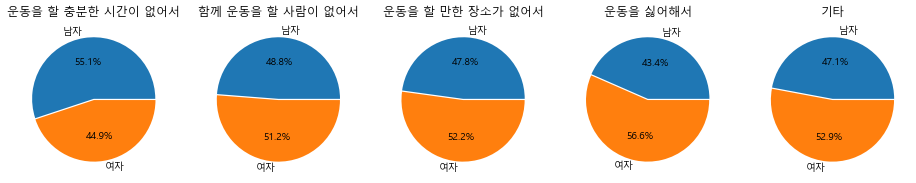

In [12]:
f, ax = plt.subplots(1,5, figsize=(16,8))

not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0,0.02], ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0,0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

not_ex_sex['운동을 할 만한 장소가 없어서'].plot.pie(explode = [0,0.02], ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

not_ex_sex['운동을 싫어해서'].plot.pie(explode = [0,0.02], ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('운동을 싫어해서')
ax[3].set_ylabel('')

not_ex_sex['기타'].plot.pie(explode = [0,0.02], ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('기타')
ax[4].set_ylabel('')

Text(0, 0.5, '')

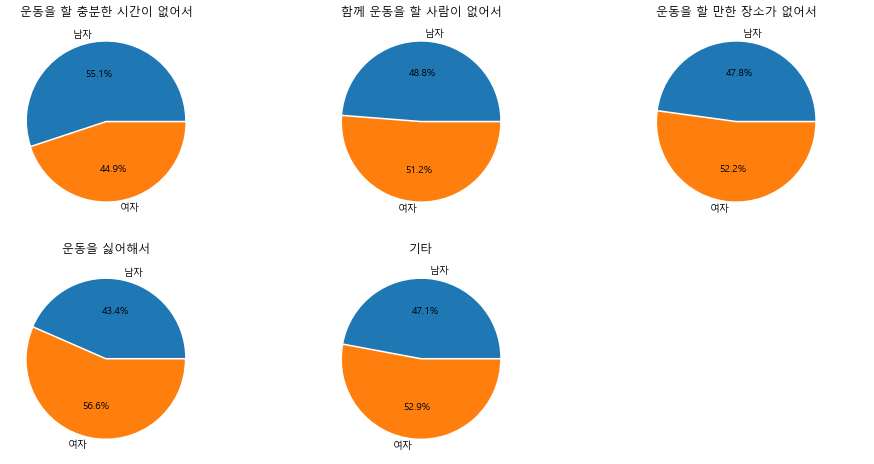

In [17]:
figure,((ax[0],ax[1],ax[2]),(ax[3],ax[4],ax1)) = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
ax1.axis('off')

not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0,0.02], ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0,0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')
        
not_ex_sex['운동을 할 만한 장소가 없어서'].plot.pie(explode = [0,0.02], ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

not_ex_sex['운동을 싫어해서'].plot.pie(explode = [0,0.02], ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('운동을 싫어해서')
ax[3].set_ylabel('')

not_ex_sex['기타'].plot.pie(explode = [0,0.02], ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('기타')
ax[4].set_ylabel('')



In [19]:
not_ex_age = not_exercise[not_exercise['대분류'] =='연령별'].copy()

not_ex_age.drop(columns= '대분류', inplace= True)
not_ex_age.set_index('분류', inplace = True)
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


Text(0, 0.5, '')

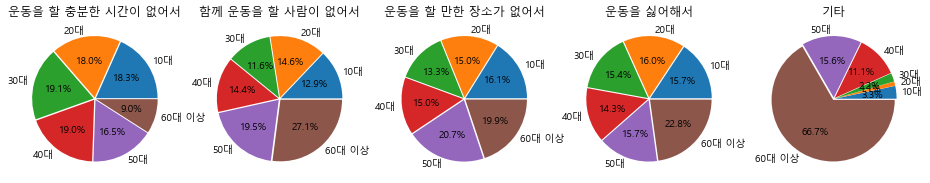

In [20]:
f, ax = plt.subplots(1,5, figsize=(16,8))
explode_setting = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode = explode_setting, ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode = explode_setting, ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

not_ex_age['운동을 할 만한 장소가 없어서'].plot.pie(explode = explode_setting, ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

not_ex_age['운동을 싫어해서'].plot.pie(explode = explode_setting, ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('운동을 싫어해서')
ax[3].set_ylabel('')

not_ex_age['기타'].plot.pie(explode = explode_setting, ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('기타')
ax[4].set_ylabel('')

Text(0, 0.5, '')

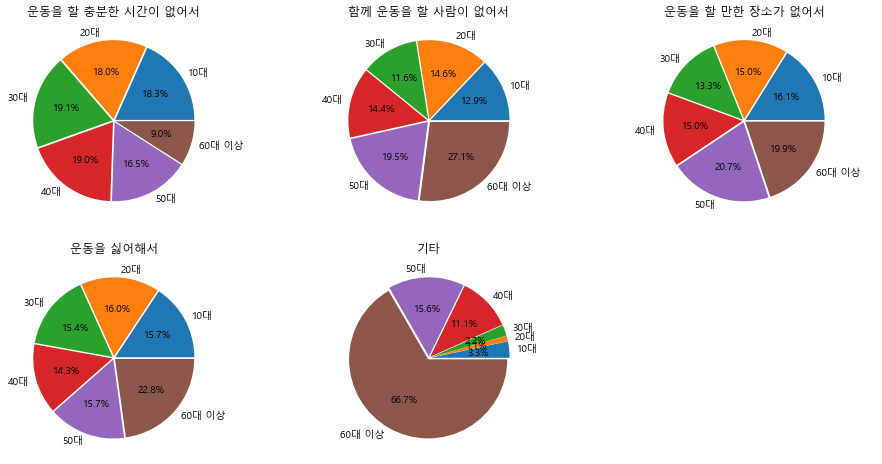

In [21]:
# f, ax = plt.subplots(1,5, figsize=(16,8))
figure,((ax[0],ax[1],ax[2]),(ax[3],ax[4],ax1)) = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
explode_setting = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
ax1.axis('off')
not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode = explode_setting, ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode = explode_setting, ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

not_ex_age['운동을 할 만한 장소가 없어서'].plot.pie(explode = explode_setting, ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

not_ex_age['운동을 싫어해서'].plot.pie(explode = explode_setting, ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('운동을 싫어해서')
ax[3].set_ylabel('')

not_ex_age['기타'].plot.pie(explode = explode_setting, ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('기타')
ax[4].set_ylabel('')
